In [ ]:
pip install backports-datetime-fromisoformat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import datetime as dt
from datetime import date, datetime, time
from sklearn.metrics import r2_score
#from backports.datetime_fromisoformat import MonkeyPatch




In [ ]:
dataset_cols = ["Date", "Open", "High", "Low", "Close", "Volume"]

df = pd.read_csv("/content/sample_data/Download Data - STOCK_CA_XTSE_RY.csv")

In [ ]:
df.head().drop("Volume", axis=1)

,Date,Open,High,Low,Close
0,03/10/2023,134.45,135.00,132.61,133.11
1,03/09/2023,136.89,137.16,134.91,135.39
2,03/08/2023,135.71,137.23,135.71,137.06
3,03/07/2023,137.21,137.21,135.62,136.54
4,03/06/2023,136.86,137.78,136.63,137.21


In [ ]:
df.columns = dataset_cols

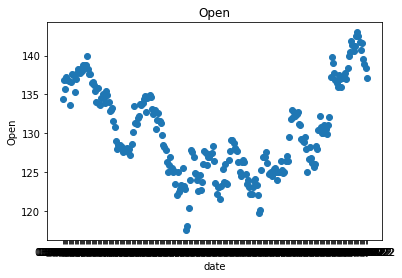

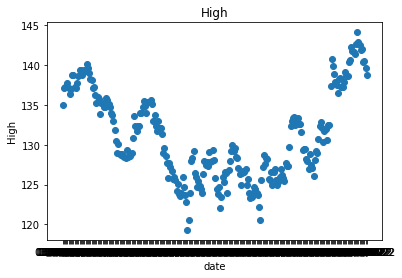

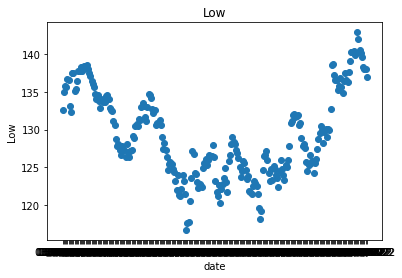

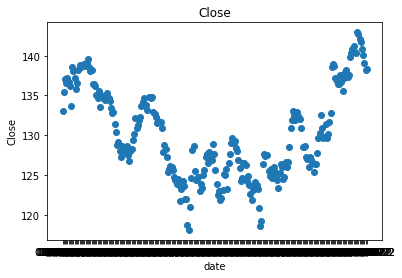

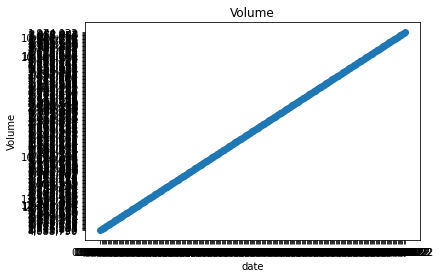

In [ ]:
for label in dataset_cols[1:]:
  plt.scatter(df["Date"],df[label])
  plt.title(label)
  plt.ylabel(label);
  plt.xlabel("date")
  plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/10/2023,134.45,135.00,132.61,133.11,"4,088,790"
1,03/09/2023,136.89,137.16,134.91,135.39,"3,352,720"
2,03/08/2023,135.71,137.23,135.71,137.06,"2,711,847"
3,03/07/2023,137.21,137.21,135.62,136.54,"2,226,903"
4,03/06/2023,136.86,137.78,136.63,137.21,"2,781,234"


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values#.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values#.reshape(-1,1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
_, X_train, Y_train = get_xy(train, "Close", x_labels=["Date"])
_, X_val, Y_val = get_xy(val, "Close", x_labels=["Date"])
_, X_test, Y_test = get_xy(test, "Close", x_labels=["Date"])

print(Y_train)

[133.68 125.9  137.56 126.07 138.67 138.99 127.68 126.05 124.87 135.3
 131.95 128.45 130.32 129.17 139.25 138.79 130.93 132.77 127.25 127.5
 124.37 131.89 130.95 133.09 141.75 128.62 119.24 125.57 142.71 138.23
 131.87 126.68 130.91 126.01 121.94 122.5  135.61 127.25 123.15 137.15
 128.55 126.35 126.89 125.76 127.61 126.89 127.73 126.58 129.26 138.72
 137.64 124.64 122.65 123.62 126.38 129.7  129.68 127.56 140.08 121.89
 123.89 128.15 134.57 138.23 130.16 126.98 123.01 142.96 132.45 138.76
 121.73 136.45 123.88 129.42 124.21 134.47 118.67 125.97 134.28 124.34
 133.49 126.04 132.87 122.02 127.96 140.49 124.97 137.32 138.04 134.69
 127.37 140.37 134.65 128.79 125.34 124.35 123.58 128.67 126.27 138.57
 124.08 135.12 128.7  123.28 136.49 133.78 128.03 140.39 137.21 131.45
 120.8  138.31 126.47 131.52 123.1  127.63 138.54 133.21 138.15 126.76
 124.2  128.93 136.4  132.32 124.72 125.61 127.22 124.43 136.86 133.77
 132.7  135.57 124.54 130.15 138.62 124.56 136.75 124.98 132.6  136.54
 129.59 

In [ ]:
#Y_train_final = np.string.replace(Y_train, ',', '.')
X_train = X_train.astype(str)
X_train = np.char.replace(X_train, '/', '')
X_train = X_train.astype(int)
print(X_train)

[12052022  8102022  4112022 11012022  2152023  2132023  9092022 10312022
  7052022  1172023  6032022  8152022  5052022  1042023  2092023  2172023
  6092022  1112023  5202022 12202022  9302022 12072022  5272022  6072022
  3172022  5242022  7142022 10282022  3212022  4042022  6082022  6132022
 12092022  6142022 10142022  9062022  1262023  9202022  8302022  4062022
  5252022  7132022  8112022  8252022  9192022  5162022  5092022  6152022
  8162022  4192022  3312022  6302022  7272022  7222022  6212022  5022022
  4272022  7082022  3152022  9012022  9262022 10052022  1182023  2212023
 12132022  9142022  9272022  3222022  6012022  2102023 10202022  4122022
 10252022 12142022  8092022  1192023 10122022  6202022  1132023  6242022
  1252023  6292022  6022022 10132022 12162022  3242022  8262022  4012022
  2272023 11232022  7112022  3292022  1272023  1052023  6282022 10262022
 10172022 12212022  8032022  4212022  7212022  1242023 10042022  7192022
  2012023 11302022  8122022  3232022  3062023  4282

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


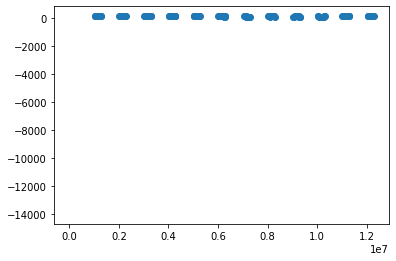

In [ ]:
#price_reg = LinearRegression()
#price_reg.fit(X_train, Y_train)

price_poly_reg = np.poly1d(np.polyfit(X_train, Y_train, 30))

myline = np.linspace(1, 22, 100)

plt.scatter(X_train, Y_train)
plt.plot(myline, price_poly_reg(myline))
plt.show()

In [ ]:
#price_reg.score(X_train, Y_train)

print(r2_score(Y_train, price_poly_reg(X_train)))



0.8843182202202927


In [ ]:
tmrw = price_poly_reg(5555555)

print(tmrw)

131.19341112552684
